# Use of normalisation function

In this example we normalise a spectrum to different values: area, maximum, or min-max.

In [2]:
%matplotlib inline
import sys
sys.path.append("../")
import numpy as np
import scipy
from matplotlib import pyplot as plt

import rampy as rp
from sklearn import preprocessing

# Signal creation

Below we create a fake Gaussian signal for the example.

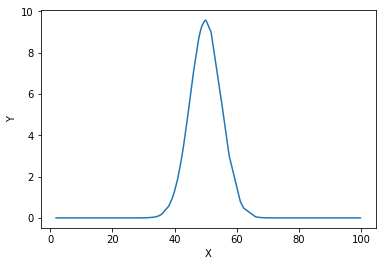

In [17]:
nb_points  =100
x = np.sort(np.random.uniform(0,100,nb_points)) # increasing point
y = 120.0*scipy.stats.norm.pdf(x,loc=50,scale=5)

plt.plot(x,y)

plt.ylabel("Y")
plt.xlabel("X")
plt.show()

We can consider that the area of the Gaussian peak should be equal to 1, as it is the value of the intergral of a Gaussian distribution.

To normalise the spectra, we can do:

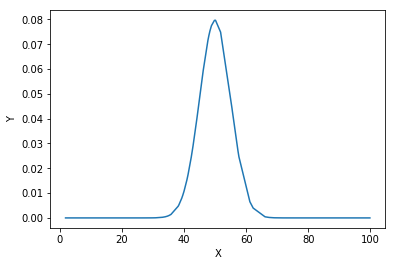

In [18]:
y_norm_area = rp.normalise(y,x=x,method="area")

plt.plot(x,y_norm_area)

plt.ylabel("Y")
plt.xlabel("X")
plt.show()

We could also just want the signal to be comprised between 0 and 1, so we normalise to the maximum:

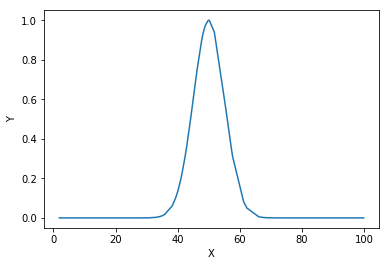

In [19]:
y_norm_area = rp.normalise(y,method="intensity")

plt.plot(x,y_norm_area)

plt.ylabel("Y")
plt.xlabel("X")
plt.show()

Now, if our signal intensity was shifted from 0 by a constant, the "intensity" method will not work well. For instance, I can add 0.1 to `y` and plot it.

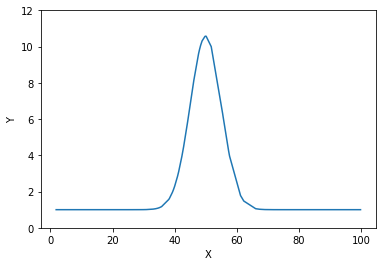

In [20]:
y2 = y + 1

plt.plot(x,y2)

plt.ylabel("Y")
plt.xlabel("X")
plt.ylim(0,12)
plt.show()

In this case, the "intensity" method will not work well:

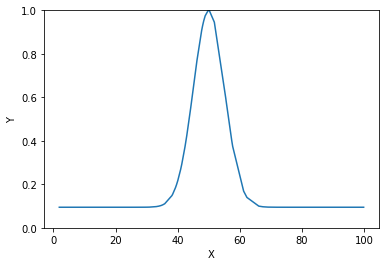

In [22]:
y_norm_area = rp.normalise(y2,method="intensity")

plt.plot(x,y_norm_area)

plt.ylabel("Y")
plt.xlabel("X")
plt.ylim(0,1)
plt.show()

The signal remains shifted from 0. For safety, we can do a min-max normalisation, which will put the minimum to 0 and maximum to 1:

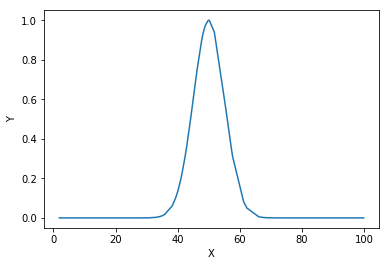

In [23]:
y_norm_area = rp.normalise(y2,method="minmax")

plt.plot(x,y_norm_area)

plt.ylabel("Y")
plt.xlabel("X")
plt.show()